In [1]:
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt

In [2]:
cols = [f"A{x}" for x in range(20)]
cols.append("class")
data = pd.read_csv("../../anon_data/ring_mondrian/k1.csv", names=cols)

In [3]:
data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A11,A12,A13,A14,A15,A16,A17,A18,A19,class
0,849.0,2177.0,598.0,1689.0,3114.0,-3406.0,3799.0,-2642.0,1578.0,-181.0,...,1633.0,4664.0,1081.0,-1172.0,-166.0,578.0,1664.0,309.0,-3028.0,0
1,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
2,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
3,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
4,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,607.0,1539.0,139.0,1378.0,-2178.0,-1.0,404.0,2064.0,653.0,-631.0,...,783.0,1106.0,1264.0,57.0,-413.0,136.0,-509.0,1423.0,1142.0,1
7396,-122.0,-1654.0,-395.0,278.0,-193.0,-463.0,1364.0,37.0,1998.0,2278.0,...,-1856.0,136.0,4604.0,-1117.0,-5735.0,173.0,1505.0,-1098.0,-5196.0,0
7397,-1854.0,1225.0,-2469.0,-351.0,1193.0,-3922.0,-2314.0,3565.0,2946.0,1463.0,...,2214.0,-1199.0,-1152.0,-1815.0,1051.0,-2244.0,2871.0,-3462.0,1619.0,0
7398,2604.0,-1541.0,1298.0,-742.0,-238.0,-1004.0,127.0,1056.0,-27.0,33.0,...,45.0,241.0,-635.0,1274.0,157.0,602.0,606.0,573.0,-751.0,1


## Max Theoretical Accuracy 

Breiman reports the theoretical expected misclassification rate as 1.3%.

(1) Breiman L. Bias, variance and arcing classifiers. Tec. Report 460, Statistics department. University of california. April 1996.

## Random Forest classifier (original)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
y = data["class"]
X = data.drop("class", axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
parameters = {
    'n_estimators':list(range(10,160,10)),
    'max_depth':[2,3,4,5,6,7],
    "max_features":list(range(2,10,2))
}

In [9]:
rfc = RandomForestClassifier()
gridsearch = GridSearchCV(rfc, parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)

/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 7, 'max_features': 2, 'n_estimators': 150}


In [10]:
predicted = gridsearch.predict(X_test)
acc = np.sum(predicted==y_test)/len(predicted)
acc

0.9358108108108109

## Random Forest classifier (minmaxed)

In [20]:
k_datas = {}
ks = list(range(1,51,2))
ks.extend(list(range(100,3900,250)))
for k in ks:
    k_datas[k] = pd.read_csv(f"../../anon_data/ring_mondrian/k{k}_minmaxed.csv").drop("Unnamed: 0", axis=1)
k_datas[7400] = pd.read_csv("../../anon_data/ring_mondrian/k7400_minmaxed.csv").drop("Unnamed: 0", axis=1)

In [21]:
k_datas[7400]

,A0_min,A0_max,A1_min,A1_max,A2_min,A2_max,A3_min,A3_max,A4_min,A4_max,...,A15_max,A16_min,A16_max,A17_min,A17_max,A18_min,A18_max,A19_min,A19_max,class
0,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,0
1,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,1
2,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,1
3,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,1
4,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,1
7396,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,0
7397,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,0
7398,-6879,6285,-7141,6921,-7734,7611,-6627,7149,-7184,6383,...,6905,-7163,7175,-8778,6896,-7554,5726,-6722,7627,1


In [25]:
def tune(k):
    y = k_datas[k]["class"]
    X = k_datas[k].drop("class", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    parameters = {
        'n_estimators':list(range(10,210,10)),
        'max_depth':[2,3,4,5,6,7],
        "max_features":list(range(2,10,2))
    }

    rfc = RandomForestClassifier()
    gridsearch = GridSearchCV(rfc, parameters, n_jobs=-1)
    gridsearch.fit(X_train, y_train)

    predicted = gridsearch.predict(X_test)
    acc = np.sum(predicted==y_test)/len(predicted)
    
    return gridsearch.best_params_, acc



In [26]:
accs = {}
params = {}

for k in k_datas.keys():
    params, acc = tune(k)
    accs[k] = acc
    params[k] = params
    print(f"####### {k} #######")
    print(f"best parameters: {params[k]}")
    print(f"best accuracy: {accs[k]}")
    


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 1 #######
best parameters: {'max_depth': 7, 'max_features': 2, 'n_estimators': 180, 1: {...}}
best accuracy: 0.9371621621621622


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 3 #######
best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 50, 3: {...}}
best accuracy: 0.65


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 5 #######
best parameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 170, 5: {...}}
best accuracy: 0.6337837837837837


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 7 #######
best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 100, 7: {...}}
best accuracy: 0.6425675675675676


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 9 #######
best parameters: {'max_depth': 5, 'max_features': 4, 'n_estimators': 60, 9: {...}}
best accuracy: 0.6297297297297297


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 11 #######
best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 20, 11: {...}}
best accuracy: 0.6331081081081081


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 13 #######
best parameters: {'max_depth': 5, 'max_features': 4, 'n_estimators': 60, 13: {...}}
best accuracy: 0.6331081081081081


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 15 #######
best parameters: {'max_depth': 3, 'max_features': 2, 'n_estimators': 30, 15: {...}}
best accuracy: 0.6081081081081081


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 17 #######
best parameters: {'max_depth': 6, 'max_features': 4, 'n_estimators': 10, 17: {...}}
best accuracy: 0.6222972972972973


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 19 #######
best parameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 90, 19: {...}}
best accuracy: 0.6067567567567568


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 21 #######
best parameters: {'max_depth': 3, 'max_features': 2, 'n_estimators': 80, 21: {...}}
best accuracy: 0.6121621621621621


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 23 #######
best parameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 20, 23: {...}}
best accuracy: 0.606081081081081


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 25 #######
best parameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 50, 25: {...}}
best accuracy: 0.6074324324324324


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 27 #######
best parameters: {'max_depth': 3, 'max_features': 4, 'n_estimators': 50, 27: {...}}
best accuracy: 0.6074324324324324


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 29 #######
best parameters: {'max_depth': 4, 'max_features': 6, 'n_estimators': 130, 29: {...}}
best accuracy: 0.6182432432432432


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 31 #######
best parameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 50, 31: {...}}
best accuracy: 0.6027027027027027


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 33 #######
best parameters: {'max_depth': 4, 'max_features': 4, 'n_estimators': 200, 33: {...}}
best accuracy: 0.5898648648648649


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 35 #######
best parameters: {'max_depth': 4, 'max_features': 8, 'n_estimators': 190, 35: {...}}
best accuracy: 0.5993243243243244


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 37 #######
best parameters: {'max_depth': 4, 'max_features': 8, 'n_estimators': 10, 37: {...}}
best accuracy: 0.5864864864864865


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 39 #######
best parameters: {'max_depth': 4, 'max_features': 8, 'n_estimators': 120, 39: {...}}
best accuracy: 0.595945945945946


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 41 #######
best parameters: {'max_depth': 4, 'max_features': 4, 'n_estimators': 80, 41: {...}}
best accuracy: 0.5932432432432433


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 43 #######
best parameters: {'max_depth': 4, 'max_features': 4, 'n_estimators': 10, 43: {...}}
best accuracy: 0.595945945945946


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 45 #######
best parameters: {'max_depth': 3, 'max_features': 2, 'n_estimators': 40, 45: {...}}
best accuracy: 0.5925675675675676


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 47 #######
best parameters: {'max_depth': 4, 'max_features': 6, 'n_estimators': 100, 47: {...}}
best accuracy: 0.5986486486486486


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 49 #######
best parameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 30, 49: {...}}
best accuracy: 0.5844594594594594


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 100 #######
best parameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 110, 100: {...}}
best accuracy: 0.5844594594594594


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 350 #######
best parameters: {'max_depth': 3, 'max_features': 8, 'n_estimators': 140, 350: {...}}
best accuracy: 0.577027027027027


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 600 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 20, 600: {...}}
best accuracy: 0.5668918918918919


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 850 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 850: {...}}
best accuracy: 0.5668918918918919


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 1100 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 1100: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 1350 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 1350: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 1600 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 1600: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 1850 #######
best parameters: {'max_depth': 4, 'max_features': 6, 'n_estimators': 10, 1850: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 2100 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 2100: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 2350 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 2350: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 2600 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 2600: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 2850 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 2850: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 3100 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 3100: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 3350 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 3350: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 3600 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 3600: {...}}
best accuracy: 0.5513513513513514


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 3850 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 3850: {...}}
best accuracy: 0.4945945945945946


/homes/rd2016/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


####### 7400 #######
best parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10, 7400: {...}}
best accuracy: 0.4945945945945946


In [28]:
for k in k_datas.keys():
    print(f"{k},{accs[k]}")

1,0.9371621621621622
3,0.65
5,0.6337837837837837
7,0.6425675675675676
9,0.6297297297297297
11,0.6331081081081081
13,0.6331081081081081
15,0.6081081081081081
17,0.6222972972972973
19,0.6067567567567568
21,0.6121621621621621
23,0.606081081081081
25,0.6074324324324324
27,0.6074324324324324
29,0.6182432432432432
31,0.6027027027027027
33,0.5898648648648649
35,0.5993243243243244
37,0.5864864864864865
39,0.595945945945946
41,0.5932432432432433
43,0.595945945945946
45,0.5925675675675676
47,0.5986486486486486
49,0.5844594594594594
100,0.5844594594594594
350,0.577027027027027
600,0.5668918918918919
850,0.5668918918918919
1100,0.5513513513513514
1350,0.5513513513513514
1600,0.5513513513513514
1850,0.5513513513513514
2100,0.5513513513513514
2350,0.5513513513513514
2600,0.5513513513513514
2850,0.5513513513513514
3100,0.5513513513513514
3350,0.5513513513513514
3600,0.5513513513513514
3850,0.4945945945945946
7400,0.4945945945945946


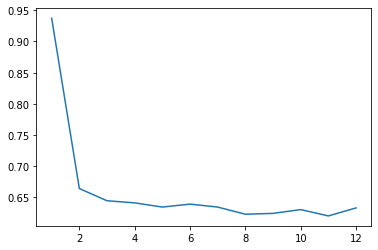

In [137]:
xs = range(1,13)
plt.plot(xs, [accs[k] for k in xs])

entropies = pd.read_csv("../../results/ring_mondrian/entropies.csv")

In [138]:
m = max(entropies["cond_entropy"])
entropies["cond_entropy"] = entropies["cond_entropy"]/m

In [139]:
entropies

,k_val,cond_entropy
0,1,0.000000
1,2,0.949246
2,3,0.952428
3,4,0.955717
4,5,0.956839
5,6,0.956839
6,7,0.956854
7,8,0.961159
8,9,0.961178
9,10,0.961178


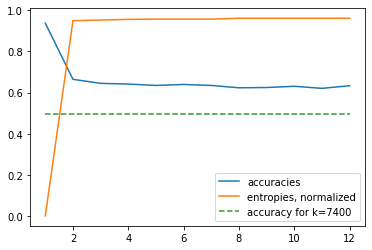

In [149]:
plt.plot(xs, [accs[k] for k in xs], label="accuracies")
plt.plot(xs, entropies["cond_entropy"][:-1], label="entropies, normalized")
plt.plot(xs, [accs[7400]]*12, linestyle="dashed", label="accuracy for k=7400")
plt.legend()